In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
x = pd.Series([1,2,3,4,5])
x

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [3]:
x + 100

0    101
1    102
2    103
3    104
4    105
dtype: int64

In [4]:
(x ** 2) + 100

0    101
1    104
2    109
3    116
4    125
dtype: int64

In [5]:
x > 2

0    False
1    False
2     True
3     True
4     True
dtype: bool

In [6]:
larger_than_2 = x > 2
larger_than_2

0    False
1    False
2     True
3     True
4     True
dtype: bool

In [7]:
larger_than_2.any()

True

In [8]:
larger_than_2.all()

False

In [9]:
def f(x):
    return x * 2 if x % 2 == 0 else x * 3

x.apply(f)

0     3
1     4
2     9
3     8
4    15
dtype: int64

In [10]:
%%timeit

ds = pd.Series(range(10000))

for counter in range(len(ds)):
    ds[counter] = f(ds[counter])

96.5 ms ± 5.79 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [11]:
%%timeit

ds = pd.Series(range(10000))

ds = ds.apply(f)

4.44 ms ± 300 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [12]:
x.astype(np.float64)

0    1.0
1    2.0
2    3.0
3    4.0
4    5.0
dtype: float64

In [13]:
y = x

In [14]:
y[0]

1

In [15]:
y[0] = 100

In [16]:
y

0    100
1      2
2      3
3      4
4      5
dtype: int64

In [17]:
x

0    100
1      2
2      3
3      4
4      5
dtype: int64

In [19]:
y = x.copy()

In [20]:
x[0]=1

In [21]:
x

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [22]:
y

0    100
1      2
2      3
3      4
4      5
dtype: int64

In [23]:
x.describe(percentile_width=50)

TypeError: NDFrame.describe() got an unexpected keyword argument 'percentile_width'

In [24]:
data = [1,2,3,4,5,6,7,8,9]
df = pd.DataFrame(data, columns=["x"])

In [25]:
df

,x
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9


In [26]:
df["x"]

0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
Name: x, dtype: int64

In [27]:
df["x"][0]

1

In [28]:
df["x_plus_2"] = df["x"] + 2
df

,x,x_plus_2
0,1,3
1,2,4
2,3,5
3,4,6
4,5,7
5,6,8
6,7,9
7,8,10
8,9,11


In [30]:
df["x_square"] = df["x"] ** 2
df["x_factorial"] = df["x"].apply(np.math.factorial)
df

,x,x_plus_2,x_square,x_factorial
0,1,3,1,1
1,2,4,4,2
2,3,5,9,6
3,4,6,16,24
4,5,7,25,120
5,6,8,36,720
6,7,9,49,5040
7,8,10,64,40320
8,9,11,81,362880


In [31]:
df["is_even"] = df["x"] % 2
df

,x,x_plus_2,x_square,x_factorial,is_even
0,1,3,1,1,1
1,2,4,4,2,0
2,3,5,9,6,1
3,4,6,16,24,0
4,5,7,25,120,1
5,6,8,36,720,0
6,7,9,49,5040,1
7,8,10,64,40320,0
8,9,11,81,362880,1


In [32]:
df["odd_even"] = df["is_even"].map({1:"odd", 0:"even"})
df

,x,x_plus_2,x_square,x_factorial,is_even,odd_even
0,1,3,1,1,1,odd
1,2,4,4,2,0,even
2,3,5,9,6,1,odd
3,4,6,16,24,0,even
4,5,7,25,120,1,odd
5,6,8,36,720,0,even
6,7,9,49,5040,1,odd
7,8,10,64,40320,0,even
8,9,11,81,362880,1,odd


In [33]:
df = df.drop("is_even")
df

C:\Users\01154\AppData\Local\Temp\ipykernel_27924\1058293628.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop("is_even", 1)


,x,x_plus_2,x_square,x_factorial,odd_even
0,1,3,1,1,odd
1,2,4,4,2,even
2,3,5,9,6,odd
3,4,6,16,24,even
4,5,7,25,120,odd
5,6,8,36,720,even
6,7,9,49,5040,odd
7,8,10,64,40320,even
8,9,11,81,362880,odd


In [34]:
df[["x", "odd_even"]]

,x,odd_even
0,1,odd
1,2,even
2,3,odd
3,4,even
4,5,odd
5,6,even
6,7,odd
7,8,even
8,9,odd


In [35]:
pd.options.display.max_columns= 60
pd.options.display.max_rows= 6
pd.options.display.notebook_repr_html = False
df

    x  x_plus_2  x_square  x_factorial odd_even
0   1         3         1            1      odd
1   2         4         4            2     even
2   3         5         9            6      odd
.. ..       ...       ...          ...      ...
6   7         9        49         5040      odd
7   8        10        64        40320     even
8   9        11        81       362880      odd

[9 rows x 5 columns]

In [36]:
df[df["odd_even"] == "odd"]

   x  x_plus_2  x_square  x_factorial odd_even
0  1         3         1            1      odd
2  3         5         9            6      odd
4  5         7        25          120      odd
6  7         9        49         5040      odd
8  9        11        81       362880      odd

In [37]:
df[df.odd_even == "even"]

   x  x_plus_2  x_square  x_factorial odd_even
1  2         4         4            2     even
3  4         6        16           24     even
5  6         8        36          720     even
7  8        10        64        40320     even

In [38]:
df[(df.odd_even == "even") | (df.x_square < 20)]

   x  x_plus_2  x_square  x_factorial odd_even
0  1         3         1            1      odd
1  2         4         4            2     even
2  3         5         9            6      odd
3  4         6        16           24     even
5  6         8        36          720     even
7  8        10        64        40320     even

In [39]:
df[(df.odd_even == "even") & (df.x_square < 20)]

   x  x_plus_2  x_square  x_factorial odd_even
1  2         4         4            2     even
3  4         6        16           24     even

In [40]:
df[(df.odd_even == "even") & (df.x_square < 20)]["x_plus_2"][:1]

1    4
Name: x_plus_2, dtype: int64

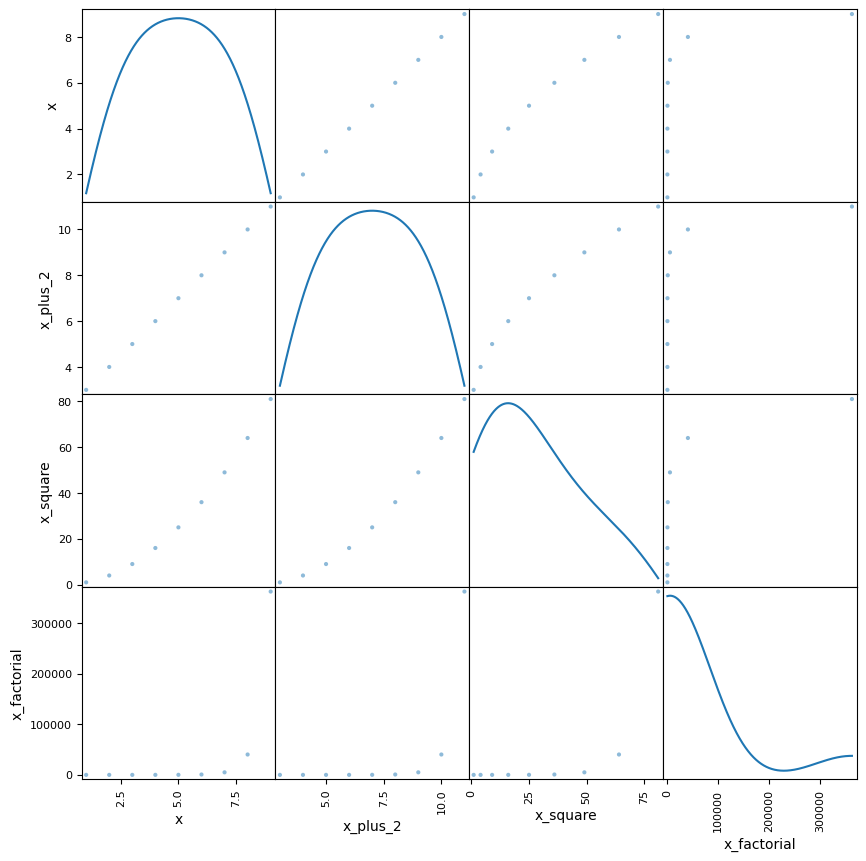

In [43]:
pd.plotting.scatter_matrix(df, diagonal="kde", figsize=(10,10));

In [44]:
df.describe()

              x   x_plus_2   x_square    x_factorial
count  9.000000   9.000000   9.000000       9.000000
mean   5.000000   7.000000  31.666667   45457.000000
std    2.738613   2.738613  28.080242  119758.341137
...         ...        ...        ...            ...
50%    5.000000   7.000000  25.000000     120.000000
75%    7.000000   9.000000  49.000000    5040.000000
max    9.000000  11.000000  81.000000  362880.000000

[8 rows x 4 columns]

In [45]:
url = "http://www.google.com/finance/historical?q=TADAWUL:TASI&output=csv"
stocks_data = pd.read_csv(url)

ParserError: Error tokenizing data. C error: Expected 172 fields in line 10, saw 3643
